# Mathematical tools for Data Scientists
We will review the following topics: 
-  Probabilities and Markov chains
-  Linear algebra, Spectral decomposition, SVD, and Principal Component Analysis
-  Optimization, Regularization, and Data approximation

These are just very basic overviews and are by no means sufficient. 
Note also, that you may want to copy these notebooks locally when working on them to avoid conflicts with later versions. 

In [39]:
import matplotlib.pyplot as plt # usefull for some display

# for some 3D plots
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

import numpy as np # some mathematical things
%matplotlib inline

# Some self-defined functions for displaying vectors
def plot_nice_vectors(my_vectors):
    # A vector is represented as an array of 2 elements
    # my_vectors is a list of 2d-arrays
    nb_vec = len(my_vectors)
    Xvalues,Yvalues = np.vstack(my_vectors).T # returns separate arrays for the x- and y-coordinates 
    # Generate anchor for the vectors
    Xanchor,Yanchor = np.zeros((nb_vec,2))
    plt.quiver(Xanchor, Yanchor, Xvalues, Yvalues, range(nb_vec), angles='xy', scale_units='xy', scale=1) 

## Review of linear algebra
Since a lot of problems can be seen as linear (inverse) problems -- e.g. sparse approximation, scientific computing, polynomial approximation/interpolation -- we review here the main ideas, that are mandatory for further processing. 

### Vector spaces and basis
Let $\mathbb{K}$ ($=\mathbb{R}$ or $\mathbb{C}$) be a field and $E$ be an additive commutative group. We say that $E$ is a field over $\mathbb{K}$ is 
1. For all $\lambda \in \mathbb{K}$ and $v \in E$, $\lambda v \in E$,
2. For all $\lambda, \mu \in \mathbb{K}$ and $u \in E$, $(\lambda + \mu)v = \lambda v + \mu v$,
3. For all $\lambda \in \mathbb{K}$ and $u,v \in E$, $\lambda (u+v) = \lambda u + \lambda v$,
4. For all $\lambda, \mu \in \mathbb{K}$ and $u \in E$, $(\lambda \cdot \mu)v = \lambda \cdot(\mu \cdot v)$,
5. If $1$ denotes the scalar multiplicative identity, then $1 \cdot v = v$, for all $v \in E$. 

In other words, we can multiply every scalars together, distribute them over the vectors, etc ... 

Let $\mathcal{V} = (v_1, \cdots, v_n)$ ($n$ not necessarily finite) be a collection of $n$ vectors in $E$. We say that $\mathcal{V}$ is <font color=blue>linearly independent</font> if 
$$
\sum c_i v_i = 0 \Leftrightarrow c_i = 0, \quad \text{for all } i.
$$

** Exercise: ** Give an example of vector space that has a family of infinitely many linearly independent vectors. 

We say that $\mathcal{V}$ is a <font color=blue>generating set</font> for $E$ if 
$$
\forall v \in E, \exists (c_i)_i \in \mathbb{K}^n: v = \sum c_i \cdot v_i.
$$

A family that is both __linearly independent__ and __generating__ is said to be a <font color=blue>basis</font>. The size of the basis is called the <font color=blue> dimension </font> of the vector space. 

**Exercise: ** Prove that the coefficients representing a given vector on a given basis are unique. 

** Example: ** Let $\mathbb{R}_n[x]$ denote the vector space (prove that it is indeed a vector space!) of polynomial of degree at most $n$ over the field of real numbers. It has dimension $n+1$ since every degree $n$ polynomial can be written as $a_0 x^0 + a_1 x^1 + \cdots + a_n x^n$ and the family $(x^i)_{0 \leq i \leq n}$ is linearly independent (prove this!)

** Exercise: ** Let $n \in \mathbb{N}$ and $0 \leq i \leq n$ and let $e_i = \sum_{j=0}^ix^j \in E := \mathbb{R}_n[x]$. Is the family $(e_i)_{i=0}^n$ linearly independent in $E$? A generating set for $E$? A basis for $E$?

Having a basis at hand helps us represent vectors the way we are used to: with an ordered set of coefficients!

**Example: ** $2+2x+x^2 \in \mathbb{R}_2[x]$ corresponds to the representation
* $(2,2,1)$ in the basis $\left( 1,x,x^2  \right)$ and to 
* $(0,1,1)$ in the basis $\left( 1, 1+x, 1+x+x^2 \right)$

**In this example, we see that the choice of basis may have an influence in the representation and hence on further processing of the data!**




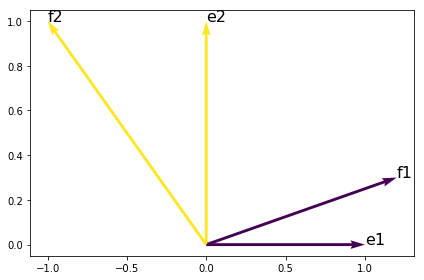

In [34]:
e1 = np.array([1,0])
e2 = np.array([0,1])
plt.figure()
plot_nice_vectors([e1,e2])
f1 = np.array([1.2,0.3])
f2 = np.array([-1,1])
plot_nice_vectors([f1,f2])

# Some automatic processing
Xvalues,Yvalues = np.vstack([e1,e2,f1,f2]).T
Xmin = np.min(Xvalues)
Xmax = np.max(Xvalues)
Ymin = np.min(Yvalues)
Ymax = np.max(Yvalues)
Xrange = Xmax-Xmin
Yrange = Ymax-Ymin
graph_extension_ratio = 0.05
Xmin -= graph_extension_ratio*Xrange
Ymin -= graph_extension_ratio*Yrange
Xmax += graph_extension_ratio*Xrange
Ymax += graph_extension_ratio*Yrange
plt.text(e1[0], e1[1],"e1",fontsize=16)
plt.text(e2[0], e2[1],"e2",fontsize=16)
plt.text(f1[0], f1[1],"f1",fontsize=16)
plt.text(f2[0], f2[1],"f2",fontsize=16)
plt.axis([Xmin, Xmax, Ymin, Ymax])

plt.tight_layout()

### Matrices and linear applications
Let $E,F$ be vector spaces on $\mathbb{K}$. We say that a mapping $\mathcal{A}: E \to V$ is a linear mapping if $$\mathcal{A}(u+t\cdot v) = \mathcal{A}(u) + t\cdot \mathcal{A}(v), \quad \text{for all } u,v \in E \text{ and } t \in \mathbb{K}.$$

Given a basis $\mathcal{B}_E = (e_j)_j$ for $E$, the sole knowledge of $\mathcal{A}(e_j)$ for all $j$'s is sufficient to completely characterize a linear map. Indeed, noticing that every vector $v \in E$ can be written (uniquely!) as $v = \sum c_j e_j$ and together with the linearity property, it follows that 
$$
\mathcal{A}(v) = \mathcal{A}(\sum c_j e_j) = \sum c_j \mathcal{A}(e_j) = \sum c_j u_j, 
$$
where we have defined $u_j = \mathcal{A}(e_j)$ the image of the basis vectors via through $A$. Since we assumed $F$ to be a vector space, it has a basis $\mathcal{B}_F = (f_i)$ on which we can represent the images $u_j = \sum_i a_{ij}f_i$. The matrix $A$ with coefficients $a_{ij}$ characterize the linear map $\mathcal{A}$ in the basis $\mathcal{B}_E$ and $\mathcal{B}_F$. 

Assuming we are given alternate basis $\mathcal{B}_E'$ and $\mathcal{B}_F'$ for $E$ and $F$ respectively, the mapping $\mathcal{A}$ can be represented with the matrix $A' = QAP^{-1}$ where $Q$ is the transition matrix from basis $\mathcal{B}_F$ to $\mathcal{B}_F'$ and $P$ the transition matrix from $\mathcal{B}_E$ to $\mathcal{B}_E'$ (i.e. the matrix with the vectors $e_j$ expressed in the basis vectors $e_j'$).

_N.B._ Changing the coordinate system will be important later on: PCA _rotate_ the space according to the variance of the data, SVD _splits_ the domain between the image and the kernel of a (non-squared) matrix. 

Two matrices that are related to one another by the _change of basis_ relation $B = QAP^{-1}$ are said to be <font color=blue>equivalent</font>. They represent the same linear application, but in different basis! If moreover $P = Q$ we say that the matrices are <font color=blue>similar</font>.

**Exercise: ** Consider the following application $\mathcal{A}: \mathbb{R}^2 \to \mathbb{R}^3$ represented by the following matrix (in the canonical basis)
$$
A = \left( \begin{array}{cc} 1 & 2 \\ 0 & 1 \\ 2 & 0  \end{array} \right).
$$
Let $\mathcal{B}_{\mathbb{R}^3}' := \left((1,0,3)^T, (2,1,0)^T, (0,0,1)^T \right)$ (prove that this is indeed a basis!).
What is the matrix representing $\mathcal{A}$ from the canonical basis of $\mathbb{R}^2$ to this new basis? 



In [35]:
# We first build the original matrix 
A = np.matrix('1 2; 0 1; 2 0')
# print(A)
# Create the transition matrix
P = np.matrix('1 -2 0; 0 1 0; -2 4 1')
print('P is a valid transition matrix, as its Determinant is {}'.format(np.linalg.det(P)))
# print(P)
Aprime = np.matmul(P,A)
print(Aprime)

P is a valid transition matrix, as its Determinant is 1.0
[[1 0]
 [0 1]
 [0 0]]



### Eigenvalue decomposition and the spectral theorem
<font color=blue>Eigenspaces</font> of a matrix $A$ are vector subspaces of the vector space $E$ that are stable by iterative applications of the linear operator $A$. Formally, we have that $v \in E$ is an <font color=blue>eigenvector</font> with <font color=blue>eigenvalue</font> $\lambda \in \mathbb{K}$ if $v \neq 0$ and $A\cdot v = \lambda \cdot v$. 
In particular, $\lambda$ is an eigenvalue of $A \Leftrightarrow A-\lambda I$ is singular $\Leftrightarrow \operatorname{det}(A-\lambda I) = 0$. 

**Exercise: ** Compute the eigenvalues and eigenvectors of the following matrices 
$$ 
A = \left( \begin{array}{cc} 1 & 4 \\ 1 & 1 \end{array} \right).
$$
Verify your results in Python.



In [36]:
ex_Matrix = np.matrix('1 4; 1 1')
D,U = np.linalg.eig(ex_Matrix)
print('Here are the eigenvalues {}'.format(D))
print('And here is the associated transition matrix \n P = {}'.format(np.sqrt(5)*U)) # added a little factor for better readability

Here are the eigenvalues [ 3. -1.]
And here is the associated transition matrix 
 P = [[ 2. -2.]
 [ 1.  1.]]


__Theorem__ If $A$ is <font color=blue>Hermitian</font> (i.e. $A^* = A$), there exists an orthonormal basis of $E$ consisting of eigenvectors of $A$. Each eigenvalue is real.

As a consequence, the matrix $A$ is similar to the diagonal matrix $D = \operatorname{diag}(\lambda_1, \cdots, \lambda _n)$ whose elements ar ethe eigenvalues (not necessarilly distinct) of $A$: $A = PDP^{-1}$ where $P$ is the matrix containing (column-wise) the eigenvectors of $A$. 

**Exercise: ** Let $A$ be the following matrix (it was generated at random from normal distributions with variance $0.5$)
$$
A = \left( \begin{array}{cccc} -0.64 & 0.14 & 1.47 & 1.16 \\ -0.28 & -0.65 & 0.97 & 0.81 \\ 0.73 & 0.23 & 0.74 & 0.65 \end{array} \right).
$$
Display the four 3-dimensional vectors in a 3D plot. 
Compute $B = A \cdot A^T$ and its spectral decomposition. 
Plot the eigenvalues of the $B$ matrix in decreasing order. 




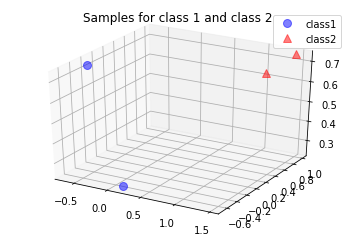

Eigenvalues of the AAt matrix: [6.22912554 0.97131738 0.38905708]


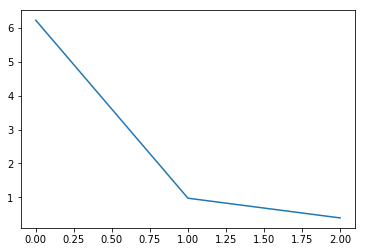

In [62]:
data_matrix = np.matrix('-0.64 0.14 1.47 1.16 ; -0.28 -0.65 0.97 0.81 ; .73 0.23 0.74 0.65 ')

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(data_matrix.A[0,0:2], data_matrix.A[1,0:2], data_matrix.A[2,0:2],'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(data_matrix.A[0,2:4], data_matrix.A[1,2:4], data_matrix.A[2,2:4], '^', markersize=8, alpha=0.5, color='red', label='class2')

plt.title('Samples for class 1 and class 2')
ax.legend(loc='upper right')

plt.show()

B = np.matmul(data_matrix,data_matrix.T)
EV,U = np.linalg.eig(B)
idx = EV.argsort()[::-1]   
EV = EV[idx]
U = U[:,idx]
print('Eigenvalues of the AAt matrix: {}'.format(EV))
plt.figure()
plt.plot(EV)

### Singular value decomposition and PCA 

One may think of the _Singular Value Decomposition_ (SVD for short) as a generalization of the eigenvalue decomposition to non-square matrices. 

__Theorem: __ Suppose $A$ is a $m \times n$ matrix over the field $\mathbb{K}$. Then there exists an SVD of $A$ of the form
$$
A = U \Sigma V^*,
$$
where
* $U$ is an $m \times m$ unitary (i.e. orthogonal) matrix over $\mathbb{K}$ ($U$ is the matrix of left-singular vectors), 
* $\Sigma$ is a diagonal $m \times n$ matrix with non-negative real values ($\Sigma$ is the matrix of singular values),
* $V$ is an $n \times n$ unitary matrix over $\mathbb{K} ($V$ is the matrix of right-singular vectors).


Computing the SVD of a matrix is fairly simple and follows the following recipe:
* The left-singular vectors of $A$ are orthonormal eigenvectors of $AA^*$. 
* The right-singular vectors of $A$ are orthonormal eigenvectors of $A^*A$. 
* The non-zero singular values of $A$ are the (positive) square roots of the non-zero eigenvalues of both $AA^*$ and $A^*A$.

__Exercise: __ Compare the SVD of the matrix $A$ of the previous example with the spectral decomposition of $B$. In particular, compare the singulare values of $A$ with the square roots of the eigen values of $B$. 
Now compare the SVD and the EVD of $B$. Do we notice anything interesting? 


In [72]:
Usvd, Dsvd, Vsvd = np.linalg.svd(data_matrix)
Deig, Ueig = np.linalg.eig(B)
UsvdB, DsvdB, VsvdB = np.linalg.svd(B)

print('Singular values of the data matrix: {} \n compared to the eigenvalue of B {}'.format(Dsvd,np.sqrt(Deig)))
print('\n\nSingular values of B: {}\n compared to its eigenvalues {}'.format(DsvdB,Deig))

Singular values of the data matrix: [2.49582162 0.98555435 0.6237444 ] 
 compared to the eigenvalue of B [2.49582162 0.6237444  0.98555435]


Singular values of B: [6.22912554 0.97131738 0.38905708]
 compared to its eigenvalues [6.22912554 0.38905708 0.97131738]


## Optimization and data approximation

### Data interpolation as a linear system 

Assume you are given a sequence of points/samples (a database) $\mathcal{D} = (x_i,y_i)_{i=1}^N$ and that you know that the $y_i$'s are coming from a function $f$ in some finite-dimensional function (vector!) space $E$ with basis vectors $(e_1,\cdots, e_n)$, i.e. $y_i = f(x_i) = \sum_{j=1}^n c_j e_j(x_i) $. Note that in cases of function spaces, the basis vectors are themselves functions!
By stacking all the sampled points on top of each other, we arrive at the following linear system
$$
\textbf{y} = A \textbf{c}, 
$$
where $\textbf{y} = (y_1, \cdots, y_N)^T$ is the data vector, $\textbf{c} = (c_1, \cdots, c_n)^T$ is the vector of coefficients of the function $f$, and $A = (a_{ij})_{1\leq i \leq N; 1 \leq j \leq n}$ with $a_{ij} = e_j(x_i)$ is the sensing matrix. 

Therefore _approximating_ or _learning_ or _interpolating_ the function $f$ from the datapoints corresponds to simply inversing the system above. If the data points are all different from one another, and $n = N$, then the matrix $A$ is invertible. (However it becomes less and less stable as the gap between the sampling points gets smaller and smaller, at least in polynomial approximation problems)

As an example, let us consider the problem of interpolating a polynomial from a few data points. We are given the following database of samples 

| $i$   |  1  |  2  |  3  |  4  |
| ----- | --- | --- | --- | --- |
| $x_i$ | $0$ | $1$ | $2$ | $3$ | 
| $y_i$ | $2$ | $0$ | $1$ | $0$ |

We will assume that the function comes from a polynomial space $\mathbb{R}_3[x]$ (degree up to 3 because we have 4 data points): 
$$
y = f(x) = c_0 + c_1 x + c_2 x^2 + c_3 x^3.
$$
The problem is then to recover the coefficients $a_i$'s from the sole knowledge of the $x_i$ and $y_i$. 
As suggested above, we can build the following Vandermonde matrix
$$
A = (a_{ij})_{1 \leq i,j \leq 4}, \quad a_{ij} = x_i^j. 
$$
Computing explicitely this matrix, we get 
$$
A = \left( \begin{array}{cccc} 1 & 0 & 0 & 0 \\ 1 & 1 & 1 & 1 \\ 1 & 2 & 4 & 8 \\ 1 & 3 & 9 & 27 \end{array} \right).
$$
This matrix has determinant $\displaystyle \operatorname{det}(A) = \prod_{1 \leq i< j \leq 4} (x_j - x_i)$ and hence is invertible as soon as $x_i \neq x_j$(but its invertibility _detoriates_ whenever two sampling points get closer and closer). 
We build the vector of data $\textbf{y} = (2,0,1,0)^T$ which leads to the following linear system: 
$$
\textbf{y} = A\textbf{c}. 
$$
Finally, we can recover the coefficients by simply computing $\textbf{c} = A^{-1}\textbf{y}$ 




The sought after polynomial reads y = f(x) = 2.0 + -5.166666666666666x + 4.0x^2 + -0.8333333333333333x^3


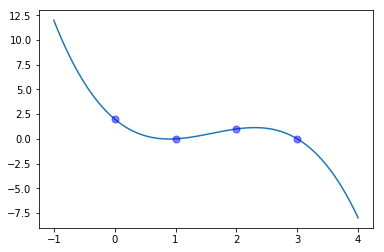

In [87]:
x_data = [0,1,2,3]
sampl_mtx = np.matrix('1 0 0 0; 1 1 1 1; 1 2 4 8; 1 3 9 27')
y_data = [2,0,1,0]
coefs = np.matmul(np.linalg.inv(sampl_mtx),y_data)
t = np.linspace(-1,4,151)
y_predicted = [coefs[0,0] + coefs[0,1]*x + coefs[0,2]*x**2 + coefs[0,3]*x**3 for x in t]

plt.figure()
plt.plot(t,y_predicted)
plt.plot(x_data, y_data, 'o', markersize=7, color='blue', alpha=0.5, label='samples')

print('The sought after polynomial reads y = f(x) = {} + {}x + {}x^2 + {}x^3'.format(coefs[0,0],coefs[0,1],coefs[0,2],coefs[0,3]))

What happens if we pick another basis for approximation, a radial basis, say. 

This new interpolation matrix on a Gaussian RBF basis has determinant -0.05614712900161912


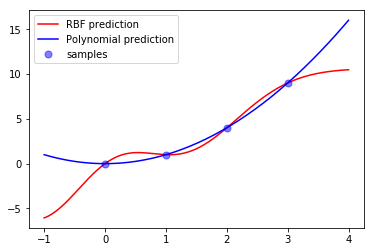

In [95]:
new_interp_mtx = [[1, np.exp(-x*x/2), np.exp(-(x-1)*(x-1)/2), np.exp(-(x+1)*(x+1)/2)] for x in x_data]
print('This new interpolation matrix on a Gaussian RBF basis has determinant {}'.format(np.linalg.det(new_interp_mtx)))

coefs_new = np.matmul(np.linalg.inv(new_interp_mtx),y_data)
t = np.linspace(-1,4,151)
y_predicted_new = [coefs_new[0] + coefs_new[1]*np.exp(-x*x/2) + coefs_new[2]*np.exp(-(x-1)*(x-1)/2) + coefs_new[3]*np.exp(-(x+1)*(x+1)/2) for x in t]

plt.plot(t,y_predicted_new, color='red', label= 'RBF prediction')
plt.plot(t,y_predicted, color='blue', label= 'Polynomial prediction')
plt.plot(x_data, y_data, 'o', markersize=7, color='blue', alpha=0.5, label='samples')
plt.legend()


The last graph shows the importance of knowing where to look for the data: is it expected to be a polynomial? a combination of Gaussian kernel (i.e. $f$ would belong to some Shift Invariant Space)? 

**Exercise: ** Check what would the first 4 harmonic of the sine series would look like!


We may ask the following questions now: 
* What happens if we don't know precisely the degree of the polynomial? 
* What happens if the data are corrupted by some noise?

Let us first look at the problem of corrupted measurements (assuming we already know the function space). 
Let us assume that the function we are trying to recover is given as the simple parabola $x \mapsto f(x) = x^2$, in the space of polynomials of degree at most $3$ (yes, $3$). 
We will also consider that the measurements are corrupted by random Gaussian noise and that sampling points are equally spaced in $[0,3]$. 


L2 norm of the error of the coefficients. Case 1 = 6.695750083365078 -- and Case 2 = 3.0935955641331954


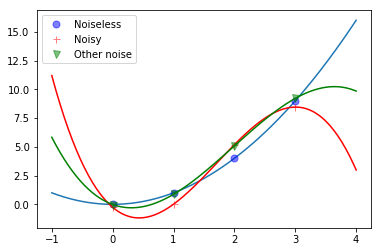

In [97]:
x_data = [0,1,2,3]
sampl_mtx = np.matrix('1 0 0 0; 1 1 1 1; 1 2 4 8; 1 3 9 27') # This will be the same for all tests here
y_data = [0,1,4,9]
coefs = np.matmul(np.linalg.inv(sampl_mtx),y_data)
t = np.linspace(-1,4,151)
y_predicted = [coefs[0,0] + coefs[0,1]*x + coefs[0,2]*x**2 + coefs[0,3]*x**3 for x in t]

y_noise1 = y_data + np.random.randn(4)
coefs1 = np.matmul(np.linalg.inv(sampl_mtx),y_noise1)
y_pred_1 = [coefs1[0,0] + coefs1[0,1]*x + coefs1[0,2]*x**2 + coefs1[0,3]*x**3 for x in t]

y_noise2 = y_data + np.random.randn(4)
coefs2 = np.matmul(np.linalg.inv(sampl_mtx),y_noise2)
y_pred_2 = [coefs2[0,0] + coefs2[0,1]*x + coefs2[0,2]*x**2 + coefs2[0,3]*x**3 for x in t]

plt.figure()
plt.plot(t,y_predicted)
plt.plot(x_data, y_data, 'o', markersize=7, color='blue', alpha=0.5, label='Noiseless')
plt.plot(t,y_pred_1, 'red')
plt.plot(x_data, y_noise1, '+', markersize=7, color='red', alpha=0.5, label='Noisy')
plt.plot(t,y_pred_2, 'green')
plt.plot(x_data, y_noise2, 'v', markersize=7, color='green', alpha=0.5, label='Other noise')
plt.legend()

print('L2 norm of the error of the coefficients. Case 1 = {} -- and Case 2 = {}'.format(np.linalg.norm(coefs-coefs1),np.linalg.norm(coefs-coefs2)))


The problem above is known as <font color=blue>overfitting</font>. 
It tends to give too much importance to every single point, instead of understanding the _global trend_ of the function. 

We also have a problem when we simply add a single point that is _close enough_ yet not quite perfect.


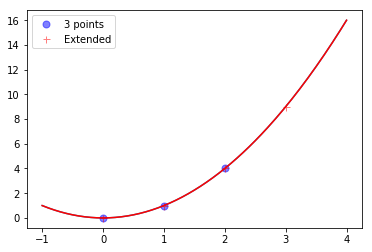

In [128]:
x_data = [0,1,2]
sampl_mtx = np.matrix('1 0 0; 1 1 1; 1 2 4') # This will be the same for all tests here
y_data = [0,1,4]
coefs = np.matmul(np.linalg.inv(sampl_mtx),y_data)
t = np.linspace(-1,4,151)
y_predicted = [coefs[0,0] + coefs[0,1]*x + coefs[0,2]*x**2 for x in t]

x_extended = list(x_data)
x_extended.append(3)
sampl_mtx_ext = [[ x**i for i in np.arange(0,len(x_extended))] for x in x_extended]
y_extended = [0,1,4,9]
coefs_ext = np.matmul(np.linalg.inv(sampl_mtx_ext),y_extended)
y_predicted_ext = [coefs_ext[0] + coefs_ext[1]*x + coefs_ext[2]*x**2 + coefs_ext[3]*x**3 for x in t]


plt.figure()
plt.plot(t,y_predicted)
plt.plot(x_data, y_data, 'o', markersize=7, color='blue', alpha=0.5, label='3 points')
plt.plot(t,y_predicted_ext, 'red')
plt.plot(x_extended, y_extended, '+', markersize=7, color='red', alpha=0.5, label='Extended')
plt.legend()


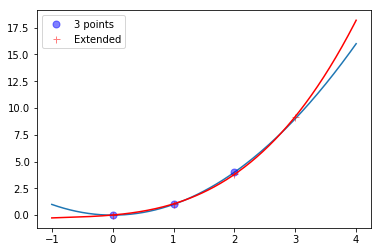

In [129]:
x_data = [0,1,2]
sampl_mtx = np.matrix('1 0 0; 1 1 1; 1 2 4') # This will be the same for all tests here
y_data = [0,1,4]
coefs = np.matmul(np.linalg.inv(sampl_mtx),y_data)
t = np.linspace(-1,4,151)
y_predicted = [coefs[0,0] + coefs[0,1]*x + coefs[0,2]*x**2 for x in t]

x_extended = list(x_data)
x_extended.append(3)
sampl_mtx_ext = [[ x**i for i in np.arange(0,len(x_extended))] for x in x_extended]
y_extended = [0.01,1.05,3.8,9.2]
coefs_ext = np.matmul(np.linalg.inv(sampl_mtx_ext),y_extended)
y_predicted_ext = [coefs_ext[0] + coefs_ext[1]*x + coefs_ext[2]*x**2 + coefs_ext[3]*x**3 for x in t]


plt.figure()
plt.plot(t,y_predicted)
plt.plot(x_data, y_data, 'o', markersize=7, color='blue', alpha=0.5, label='3 points')
plt.plot(t,y_predicted_ext, 'red')
plt.plot(x_extended, y_extended, '+', markersize=7, color='red', alpha=0.5, label='Extended')
plt.legend()

### Least squares and data approximation

In the case of least-squares approximation, we will oversample our function (i.e. sample more points than the number of freedom in our model) with the hope that they will compensate for the noisy measurements. 

In this case, can no longer enforce a perfect interpolation of our data, but can only hope to have a <font color=blue>best fit</font>; where _fit_ means whatever measure of discrepancy is aadequate to your data. For instance, measuring the fitness in terms of an $\ell_2$ norm might not be the best idea when dealing with binary classification problems. 

As an example, we consider curve fitting and will use the $\ell_2$ norm as a measure of fitnees. This norm has two main advantages over some other measures of fidelity/discrepancy:
* It is convex. Therefore it allows for efficient and reliable numerical and analytical computations. 
* It stems from a Hilbert space, i.e. one embedded with an inner product. 

Let's have a look at the problem formulation. Assume we are trying to fit a degree three polynomial to the data points. We have our basis functions $(1,x,x^2,x^3)$ and try to fit (_learn_) a function $\displaystyle f(x) = \sum_{i=0}^3c_ix^i = \langle \textbf{c}, \vec{x} \rangle = \vec{x}^T \textbf{c}$ where $\vec{x}$ corresponds to the vector of powers of the sampling point $x$. 
Given $m$ sampling points $x_1,\cdots, x_m$ with $x_i \neq x_j$ for all $i \neq j$, we measure the noisy samples $y_i = f(x_i) + \varepsilon_i = \vec{x_i}^T\textbf{c} + \varepsilon_i$. 
Stacking all the elements on top of each others yields the following linear system 
$$
(y_i)_{i=1}^m = \textbf{y} = X\textbf{c} + \varepsilon
$$
with $X \in \mathbb{R}^{m \times 4}$ with $m > 4$ (overdetermined linear system).

We are trying to find the set of coefficient that best fits the data in the $\ell_2$ sense: 
$$
\displaystyle \textbf{c}^* = \operatorname{argmin}_{\textbf{c} \in \mathbb{R}^4}\|\textbf{y} - X\textbf{c}\|_2 = \textbf{c}^* = \operatorname{argmin}_{\textbf{c} \in \mathbb{R}^4}\frac{1}{2}\|\textbf{y} - X\textbf{c}\|_2^2.
$$
We re-write this a little bit: 
$$
L(\textbf{c}) = \frac{1}{2}\|\textbf{y} - X\textbf{c}\|_2^2 = \frac{1}{2} \left( \|\textbf{y}\|_2^2 + \|X\textbf{c}\|_2^2 - \langle y,  X\textbf{c}\rangle \right) = \frac{1}{2} \left( \|\textbf{y}\|_2^2 + \langle X\textbf{c}, X\textbf{c} \rangle - \langle X^Ty, \textbf{c}\rangle \right).
$$

Now remembering Fermat's theorem (which states that every extremum of a differentiable function is at a stationary point, and knowing that a convex function, which this norm is, has a unique minimizer), we only have to find the stationary points. 
Hence taking the derivative with respect to $\textbf{c}$ and setting it to $0$ yields 
$$
\nabla L(\textbf{c}) = X^TX\textbf{c} - X^Ty = 0. 
$$
This is known as the normal equations (or KKT conditions in case of constrained problems). One can show that the matrix $X^TX$ is invertible (as a consequence of the sampling points being all different from one another), which yields the solution
$$
\textbf{c} = (X^TX)^{-1}X^T\textbf{y}. 
$$
The matrix $(X^TX)^{-1}X^T$ is known as the <font color=blue>Moore-Penrose pseudo-inverse</font> of $X$. 


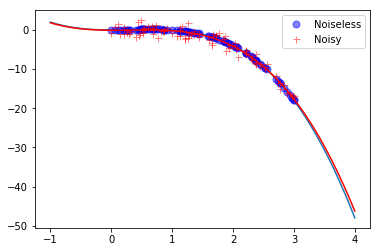

In [143]:
x_data = np.random.uniform(0,3,20)
max_degree = 3
sampl_mtx = [[ x**i for i in np.arange(0,max_degree+1)] for x in x_data]
y_data = [x**2-x**3 for x in x_data]
coefs = np.matmul(np.linalg.pinv(sampl_mtx),y_data)
t = np.linspace(-1,4,151)
y_predicted = [coefs[0] + coefs[1]*x + coefs[2]*x**2 + coefs[3]*x**3 for x in t]

# Now let's try with some noise on it
noise_level = 1
y_noisy = [x**2-x**3 for x in x_data] + np.random.normal(0,noise_level,len(x_data))
coefs_noisy = np.matmul(np.linalg.pinv(sampl_mtx),y_noisy)
y_pred_noisy = [coefs_noisy[0] + coefs_noisy[1]*x + coefs_noisy[2]*x**2 + coefs_noisy[3]*x**3 for x in t]


plt.figure()
plt.plot(t,y_predicted)
plt.plot(x_data, y_data, 'o', markersize=7, color='blue', alpha=0.5, label='Noiseless')
plt.plot(t,y_pred_noisy, 'red')
plt.plot(x_data, y_noisy, '+', markersize=7, color='red', alpha=0.5, label='Noisy')
plt.legend()


### Regularization

We are still left with the choice of the model. Typically, we will try to find functions that are of a certain _class_ (understand function space), e.g. $f \in H^2(\Omega)$, in a Sobolev class. 
More precisely, what we did before was 
$$
\text{Find } f \text{ such that } $f$ \text{ minimizes } \|(f(x_i)-y_i)_i\| \text{ subject to } f \in H^2_0(\Omega). 
$$
In the first examples, we had explicitely/implicetly written $f \in \mathbb{R}_3[x]$. This prior knowledge of classes of function is basically implicit in the choice of the basis. 
More importantly, we want to address the problem of not knowing the exact signal model. Consider the problem of fitting a degree 2 or a degree 3 polynomial, we would need to try and test (**Not done here: We should split the data base into a training set that is supposed to leard the coefficient and then assess the quality of the model on the remain test samples. Adapting a cross validation strategy may be usefull here. **)


Norm of the coefficients in the degree 3 case: 1.313782757091417 and in the degree 4 case 2.8696677858570867


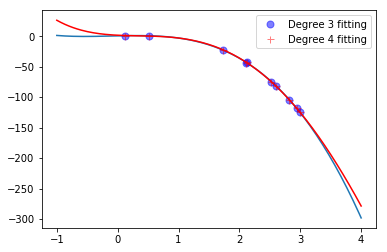

In [165]:
x_data = np.random.uniform(0,3,10)
max_degree = 3
sampl_mtx = [[ x**i for i in np.arange(0,max_degree+1)] for x in x_data]
t = np.linspace(-1,4,151)

# Now let's try with some noise on it
noise_level = 1
y_3 = [0.01+x**2-5*x**3 for x in x_data] + np.random.normal(0,noise_level,len(x_data))
coefs_3 = np.matmul(np.linalg.pinv(sampl_mtx),y_3)
y_pred_3 = [coefs_3[0] + coefs_3[1]*x + coefs_3[2]*x**2 + coefs_3[3]*x**3 for x in t]


# Now let's try fitting a degree 4 polynomial! 
max_degree = 4
sampl_mtx = [[ x**i for i in np.arange(0,max_degree+1)] for x in x_data]

# Now let's try with some noise on it
y_noisy = [x**2-x**3 for x in x_data] + np.random.normal(0,noise_level,len(x_data))
coefs_4 = np.matmul(np.linalg.pinv(sampl_mtx),y_3)
y_pred_4 = [coefs_4[0] + coefs_4[1]*x + coefs_4[2]*x**2 + coefs_4[3]*x**3 + coefs_4[4]*x**4 for x in t]


plt.figure()
plt.plot(t,y_pred_3)
plt.plot(x_data, y_3, 'o', markersize=7, color='blue', alpha=0.5, label='Degree 3 fitting')
plt.plot(t,y_pred_4, 'red')
plt.plot(x_data, y_3, '+', markersize=7, color='red', alpha=0.5, label='Degree 4 fitting')
plt.legend()
print('Norm of the coefficients in the degree 3 case: {} and in the degree 4 case {}'.format(np.linalg.norm(coefs_3)/4,np.linalg.norm(coefs_4)/5))

From the previous example, we can see, that a _simpler_ model may also have a lower norm for its parameters. As the coefficients get higher, we start seeing strong oscillations that may not be hoped for. 

In case the model is not completly known (but only partially), we may want to use some <font color=blue>regularitzation</font> techniques. 
For instance, we are searching for a function that we hope is a polynomial, but are unsure about the maximal degree. 
In this case, we might have an upper bound on the degree (say $d$) and try to minimize the <font color=blue>data fidelity</font> term, with the constraint that the norm of the coefficients be small enough
$$ 
\displaystyle \left\{ \begin{array}{l}\operatorname{min}_{\textbf{c} \in \mathbb{R}^{d+1}}\|X\textbf{c} - \textbf{y} \\ \text{Subject to } \|\textbf{c}\|_2 \leq B \end{array} \right.
$$

We can show (but will not do it here) that this problem is equivalent to the following <font color=blue>regularized</font> problem also called <font color=blue>Lagrangian formulation</font>
$$
\displaystyle \operatorname{minimize}_{\textbf{c} \in \mathbb{R}^{d+1}}\frac{1}{2}\|X\textbf{c} - \textbf{y}\|_2^2 + \frac{\lambda}{2}\|\textbf{c}\|_2^2. 
$$
The solution is given (via the normal equations) by 
$$
\textbf{c}^* := (A^TA + \lambda I)^{-1}A^T \textbf{y}
$$
This particular example of regularized problem is also called <font color=blue>Tikhonov regularization</font>.



[-0.00017855 -0.00105847 -0.00288267 -0.00754199 -0.01990774 -0.05351703]
[ 0.03159026  0.00908139 -0.00740309 -0.03179961 -0.05917591 -0.04267118]
[-1.24599253e-02  1.19685691e+01 -3.14569939e+01  3.01847993e+01
 -1.23839611e+01  1.73450345e+00]


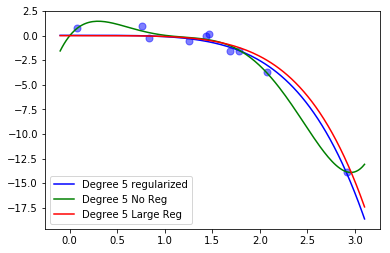

In [188]:
x_data = np.random.uniform(0,3,10)
max_degree = 5
sampl_mtx = np.array([[ x**i for i in np.arange(0,max_degree+1)] for x in x_data])
t = np.linspace(-0.1,3.1,151)

# Now let's try with some noise on it
noise_level = 1
y_3 = [x**2-x**3 for x in x_data] + np.random.normal(0,noise_level,len(x_data))
coefs_3 = np.matmul(np.matmul(np.linalg.inv(np.matmul(sampl_mtx.T,sampl_mtx) + 50*np.eye(max_degree+1)), sampl_mtx.T),y_3)
y_pred_3 = [coefs_3[0] + coefs_3[1]*x + coefs_3[2]*x**2 + coefs_3[3]*x**3 + coefs_3[4]*x**4 + coefs_3[5]*x**5 for x in t]

coefs_noreg = np.matmul(np.linalg.pinv(sampl_mtx),y_3)
y_pred_noreg = [coefs_noreg[0] + coefs_noreg[1]*x + coefs_noreg[2]*x**2 + coefs_noreg[3]*x**3 + coefs_noreg[4]*x**4 + coefs_noreg[5]*x**5 for x in t]

coefs_bigreg = np.matmul(np.matmul(np.linalg.inv(np.matmul(sampl_mtx.T,sampl_mtx) + 5000*np.eye(max_degree+1)), sampl_mtx.T),y_3)
y_pred_bigreg = [coefs_bigreg[0] + coefs_bigreg[1]*x + coefs_bigreg[2]*x**2 + coefs_bigreg[3]*x**3 + coefs_bigreg[4]*x**4 + coefs_bigreg[5]*x**5 for x in t]


plt.figure()
plt.plot(t,y_pred_3, color='blue', label='Degree 5 regularized')
plt.plot(x_data, y_3, 'o', markersize=7, color='blue', alpha=0.5)
plt.plot(t,y_pred_noreg, color='green', label='Degree 5 No Reg')
plt.plot(t,y_pred_bigreg, color='red', label='Degree 5 Large Reg')
plt.legend()

print(coefs_bigreg)
print(coefs_3)
print(coefs_noreg)

## Graph-based representations

* Coarse definition
* Directed, undirected graphs
* Spectral clustering: definition of a similarity measure, data points as vertices of a graph, affinity matrix and graph Laplacian, spectral decomposition

## Probability theory and Markov property

### Basics of probability

* Probability distribution
* Marginal
* Conditional probability
* Bayes' theorem

### Markov model

* What is a Markov chain
* Graph representation
* Perron Frobernius theorem